# Programmers Dev Match : 미술 작품 분류하기 프로젝트

- 이미지 입력 크기 : 3(Channel) * 227(Width) * 227(Height)

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import numpy as np

import os
import zipfile

import random

import shutil

In [2]:
# 다운로드 받은 이미지 압축 파일 해제
local_zip = './train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/train')
zip_ref.close()

local_zip = './test.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/test')
zip_ref.close()

In [3]:
# 훈련 이미지 디렉토리 설정

base_dir = './tmp'

train_dir = os.path.join(base_dir, 'train/train/')
test_dir = os.path.join(base_dir, 'test/test/0/')

train_val = {}

try:
    if not os.path.exists(base_dir + "/" + "val"):
        os.makedirs(base_dir + "/" + "val")
except OSError:
    print ('Error: Creating directory. ' +  base_dir + "/" + "val")

    
# for folder in os.listdir(train_dir):
    
#     try:
#         if not os.path.exists(base_dir + "/" + "val/" + folder):
#             os.makedirs(base_dir + "/" + "val/" + folder)
#     except OSError:
#         print ('Error: Creating directory. ' +  base_dir + "/" + "val/" + folder)
    
#     for f_name in os.listdir(train_dir + folder)[int(len(os.listdir(train_dir + folder)) * 0.8):]:
#         new_path = shutil.move(train_dir + folder + "/" + f_name, "./tmp/val/" + folder)

# train / val 분리 확인
# for folder in os.listdir(train_dir):
#     print(len(os.listdir(base_dir + "/" + "val/" + folder)))
#     print(len(os.listdir(base_dir + "/" + "train/train/" + folder)))
#     print("-----")
print(os.listdir(base_dir + "/" + "val"))
# os.rmdir(base_dir + "/" + "val/" + '.ipynb_checkpoints')

['house', 'giraffe', 'person', 'dog', 'elephant', 'horse', 'guitar']


In [4]:
# train/test 경로에 따른 이미지 파일 확인
# training image 폴더명 : 파일명 형태로 정리
train_file = {}

test_file = os.listdir(test_dir)
for folder in os.listdir(train_dir):
    train_file[folder] = os.listdir(train_dir + folder)
print(len(os.listdir(test_dir)))
print(os.listdir(train_dir))

350
['house', 'giraffe', 'person', 'dog', 'elephant', 'horse', 'guitar']


In [5]:
def to_one_hot(labels, dimension=7):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

In [6]:
%matplotlib inline
import matplotlib.image as mpimg

# 이미지를 matplotlib를 사용해서 4 * 4 형태의 격자로 출력 예정
nrows = 4
ncols = 4

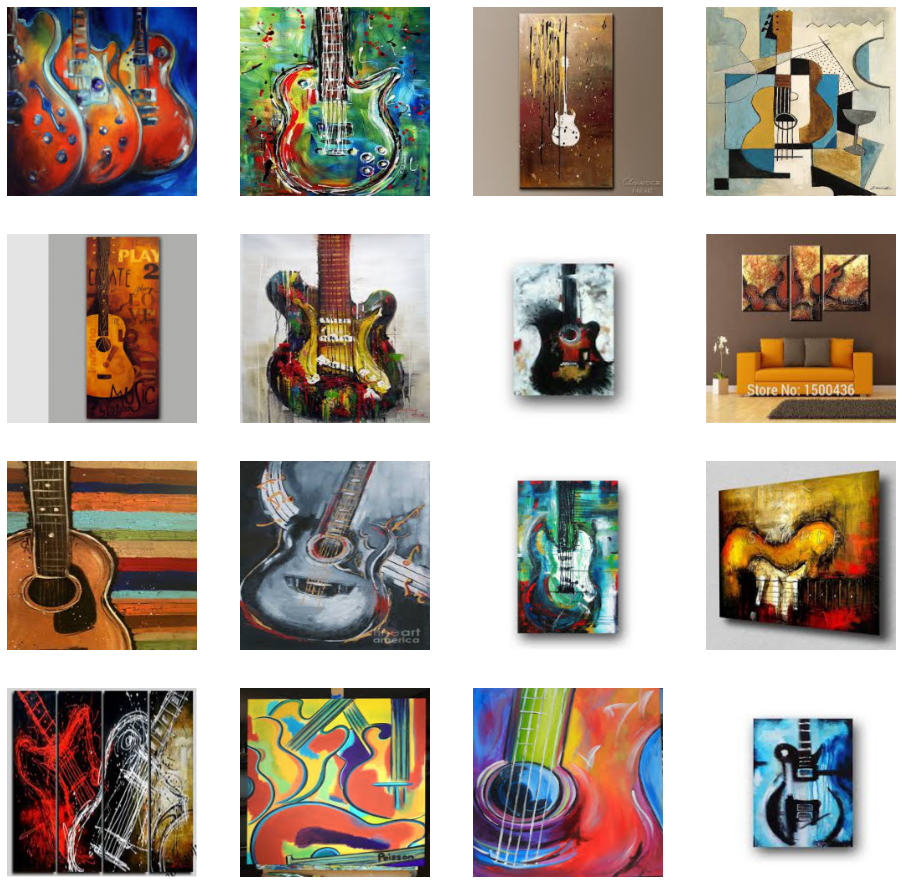

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for folder_name in os.listdir(train_dir):
    for i, img_path in enumerate(train_file[folder_name][:16]):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(train_dir + folder_name + "/" + img_path)
        plt.imshow(img)

plt.show()

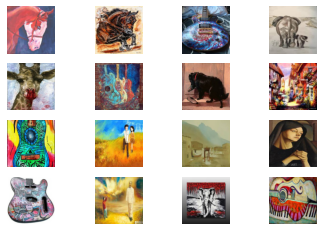

In [8]:
# validation image show
for i, img_path in enumerate(test_file[:16]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(test_dir + img_path)
    plt.imshow(img)

plt.show()

In [9]:
## CNN 다중 분류 이미지 sample test

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(227,227),
	class_mode='categorical',
    batch_size=128
)

val_generator = validation_datagen.flow_from_directory(
	base_dir + "/" + "val/",
	target_size=(227,227),
	class_mode='categorical', 
    batch_size=128
)

test_generator = test_datagen.flow_from_directory(
	'./tmp/test/test',
	target_size=(227,227),
	class_mode='categorical',
  batch_size=128
)


Found 1698 images belonging to 7 classes.
Found 341 images belonging to 7 classes.
Found 350 images belonging to 1 classes.


In [10]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(227, 227, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
#     tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32, activation='relu'), 
    
    
    tf.keras.layers.Dense(7, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy']) 
# optimizer changed => rmsprop into adam
# adam을 사용했을 때 훈련 정확도가 더 높아졌다.
# 이유가 뭘까?

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [11]:
history = model.fit(train_generator, epochs=100, validation_data = val_generator)

Epoch 1/100
14/14 [==============================] - 47s 3s/step - loss: 2.1654 - accuracy: 0.2191 - val_loss: 10.2621 - val_accuracy: 0.0792
Epoch 2/100
14/14 [==============================] - 21s 2s/step - loss: 1.9322 - accuracy: 0.2709 - val_loss: 10.1764 - val_accuracy: 0.1378
Epoch 3/100
14/14 [==============================] - 21s 2s/step - loss: 1.8611 - accuracy: 0.2968 - val_loss: 6.3812 - val_accuracy: 0.1378
Epoch 4/100
14/14 [==============================] - 21s 2s/step - loss: 1.7562 - accuracy: 0.3357 - val_loss: 2.7150 - val_accuracy: 0.2229
Epoch 5/100
14/14 [==============================] - 21s 2s/step - loss: 1.7512 - accuracy: 0.3439 - val_loss: 4.5028 - val_accuracy: 0.1437
Epoch 6/100
14/14 [==============================] - 21s 1s/step - loss: 1.7243 - accuracy: 0.3469 - val_loss: 3.6961 - val_accuracy: 0.1760
Epoch 7/100
14/14 [==============================] - 21s 2s/step - loss: 1.6960 - accuracy: 0.3675 - val_loss: 2.7990 - val_accuracy: 0.2258
Epoch 8/100

In [12]:
prediction = model.predict(test_generator)
prediction

array([[3.77242900e-02, 4.36482131e-02, 8.73312503e-02, ...,
        9.47780255e-03, 7.43764162e-04, 1.86515898e-02],
       [1.80400293e-02, 1.77685618e-02, 2.78230931e-04, ...,
        4.37916862e-03, 1.04067347e-03, 2.10060418e-01],
       [2.14871511e-01, 7.32388973e-01, 4.96443408e-03, ...,
        7.34341284e-03, 2.26760954e-02, 1.33920135e-02],
       ...,
       [5.97620547e-01, 1.45411626e-01, 3.31380958e-04, ...,
        7.60658160e-02, 1.01091461e-02, 1.67757213e-01],
       [2.94179227e-02, 2.02896357e-01, 1.62336731e-03, ...,
        5.67361891e-01, 3.58418338e-02, 1.36595741e-01],
       [5.44335321e-02, 1.88526526e-01, 1.33018440e-03, ...,
        6.84086561e-01, 2.34691259e-02, 4.69452292e-02]], dtype=float32)

In [13]:
evaluate = model.evaluate(test_generator)
evaluate

3/3 [==============================] - 1s 387ms/step - loss: 27.2094 - accuracy: 0.0714


[27.209365844726562, 0.0714285746216774]

# CNN 단순 모델을 활용했을 때의 두번째 학습 결과 확인하기

훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 overfitting 되기 시작하고, 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다.

특히 지금의 경우, 검증 데이터가 분류되어 있는 것이 아니라 7개 클래스가 모두 섞여 있는 상태다.

훈련 데이터셋 외의 데이터에서 성능을 모니터링하는 방법은 무엇인가?


```python
tf.keras.layers.Dense(32, activation='relu'), # 512 -> 128로 변경 -> 32로 한 번 더 변경
tf.keras.layers.Dense(7, activation='softmax')
```

은닉 유닛이 많아지면 신경망이 더 복잡한 표현을 학습할 수 있지만, 계산 비용이 커지고 원하지 않는 패턴을 학습하게 될 확률이 높아진다.
즉, 훈련 데이터에서 성능은 높아지지만, 테스트 데이터에서는 그렇지 못한 상황이 만들어진다.

epoch을 100으로 늘렸음에도 훈련 정확도는 늘어났지만 검증 정확도는 점점 떨어지는 모습을 보인다.

즉 과적합 상태다.

Validation 데이터에서의 Noise를 어떻게 더 줄일 수 있을까?

![image](https://user-images.githubusercontent.com/40455392/133923958-ccc61a98-e3ab-4f89-81b3-537efe093f99.png)


# CNN 단순 모델을 활용했을 때의 세번째 학습 결과 확인하기


```python
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
```

아직까지 과적합 상태를 근본적으로 해결한 것은 아니고, 오히려 이렇게 은닉층을 늘리는 것은 결과적으로 과적합을 더 강화시킬 수 있다.

그럼에도 한 가지 얻은 수확은 validation 정확도가 매 epoch의 격차가 2번재 학습에서 크게 나왔던 것에 반해 이전보다 조금 더 일정하게 정확도를 얻은 점이다.

두 번 정도 더 단순 CNN을 사용한 학습 정도를 개선시켜보고, 캐글 등 대회에서 이미지 다중 분류에 높은 성적을 얻은 모델을 적용하는 방식으로 접근해보자.

그리고 결과적으로 이 모델을 제출하기 위해서는 csv 파일에 레이블로 제출해야하니, 그것까지 감안해서 결과물을 한 번 만들어보자.

![image](https://user-images.githubusercontent.com/40455392/133918841-9e856fe1-5445-4b00-b88e-fd5d2dee07d4.png)

# 4번째 CNN 학습 진행 결과 (validation data set 분리 & 미니 배치 크기 변경, 배치 정규화 도입 등)

- 기존 training data에서 20% 만큼을 validation 데이터 셋으로 분류 진행 (데이터 자체가 워낙 적다보니, 기존에 코세라에서 배운 것처럼 10%를 쪼개서 validation set으로 사용할 경우, 충분히 validate가 안될 것이라 판단)

- 이후, 기존에 Image Generator에 적용되어 있던 미니 배치 크기 변경 (1 -> 64 -> 128로 단계적으로)

- 배치 정규화 적용 (각 신경망에서 출력된 결과 값의 정규화 적용)

- 활성화 비율이 낮은 노드에 대해 dropout 사용

등으로 결과를 조율했더니 학습 정확도 향상에 따른 validation 정확도가 함께 향상되었다.

그러나 아직 Test 결과 값과의 정확도 차이가 많이 나서 이제 이 부분을 조율해보는 단계를 거쳐보자.

이루지 못 할 일은 없다.


![image](https://user-images.githubusercontent.com/40455392/133996171-fa65334c-7b49-4581-83df-e92d84c477ad.png)


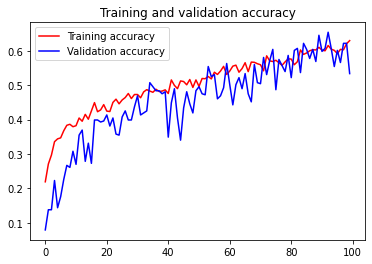

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

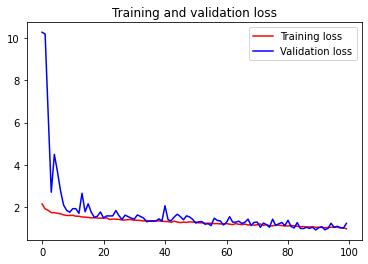

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()